This is needed to reload modules without restarting the kernel

In [1]:
%load_ext autoreload
%autoreload 2

In [112]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

This is needed to add eda_tools from the directories above

In [3]:
import os
os.sys.path.append('../../')

In [4]:
import uproot
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mplhep as hep
hep.set_style('ATLAS')

In [5]:
from eda_tools.utilities import getNorm

/mnt/storage/lborgna/condaenv/py36/lib/python3.6/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.unsupervised module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/mnt/storage/lborgna/condaenv/py36/lib/python3.6/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.tree.tree module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.tree. Anything that cannot be imported from sklearn.tree is now part of the private API.
  warnings.warn(message, FutureWarning)


In [6]:
from scipy.spatial.distance import euclidean

In [7]:
from hh4b_utils.nnt_tools import load_nnt

In [8]:
from eda_tools.bkg_helper import bs_error

In [9]:
from scipy.stats import wasserstein_distance

# Optimization Results analysis

### Constants: Features to use and bin ranges

In [10]:
features = ["m_hh", "X_wt_tag", "pt_hh", "dR_hh"]
ranges = [(200, 1200), (1.5, 9), (0, 250), (1.5, 3.5)]
nbins = [50, 50, 50, 50]
bin_edges = []
for hrange, nb in zip(ranges, nbins):
    be = np.linspace(hrange[0], hrange[1], nb+1)
    bin_edges.append(be)

In [11]:
labels = ["CRxCR", "VRxVR", "VRxCR", "CRxVR"]
krs = [2, 1, 1, 2]
model_region = ["CR", "VR", "CR", "VR"]

### Loading Data Results

In [12]:
!ls -lh /mnt/storage/lborgna/NNT/MDR_VEC/data/optimization/results*

-rw-r--r-- 1 lborgna users 86K Apr 28 02:36 /mnt/storage/lborgna/NNT/MDR_VEC/data/optimization/results_2016_bs.json
-rw-r--r-- 1 lborgna users 17K Apr 28 02:35 /mnt/storage/lborgna/NNT/MDR_VEC/data/optimization/results_2016.pkl
-rw-r--r-- 1 lborgna users 86K Apr 28 11:20 /mnt/storage/lborgna/NNT/MDR_VEC/data/optimization/results_2016_test_bs.pkl
-rw-r--r-- 1 lborgna users 86K May 12 14:34 /mnt/storage/lborgna/NNT/MDR_VEC/data/optimization/results_2016_test_dRhh_bs.pkl
-rw-r--r-- 1 lborgna users 18K May 12 14:32 /mnt/storage/lborgna/NNT/MDR_VEC/data/optimization/results_2016_test_dRhh.pkl
-rw-r--r-- 1 lborgna users 86K Apr 28 02:37 /mnt/storage/lborgna/NNT/MDR_VEC/data/optimization/results_2017_bs.json
-rw-r--r-- 1 lborgna users 17K Apr 28 02:36 /mnt/storage/lborgna/NNT/MDR_VEC/data/optimization/results_2017.pkl
-rw-r--r-- 1 lborgna users 86K May 12 14:59 /mnt/storage/lborgna/NNT/MDR_VEC/data/optimization/results_2017_test_dRhh_bs.pkl
-rw-r--r-- 1 lborgna users 18K May 12 14:58 /mnt/sto

In [13]:
opt_data_16 = pd.read_pickle("/mnt/storage/lborgna/NNT/MDR_VEC/data/optimization/results_2016_test_dRhh.pkl")

In [14]:
opt_data_16.head(1)

model_key  model_type  chis2_all  chis2_bs_all  chis_shape_all  \
0    M0F0T0  NN_nominal    1.59969      1.378366        0.903377   

                                                chis  \
0  [1.2241466913621701, 1.257391766252282, 1.2859...   

                                             chis_bs  \
0  [0.9410551923874383, 1.171018294267495, 1.0573...   

                                          chis_shape        ed     ed_bs  ...  \
0  [0.6392588159449513, 0.916359926754386, 0.8160...  1.560466  1.245934  ...   

   chi2_vrvr_shape_all  chi2_crvr_all  chi2_crvr_bs_all  chi2_crvr_shape_all  \
0             1.155413       0.581585           0.42524              0.42524   

   chi2_vrcr_all  chi2_vrcr_bs_all  chi2_vrcr_shape_all  chi2_closure  \
0       1.235915          0.940857             0.743987      1.286171   

   chi2_extrapolation_bs  chi2_extrapolation_shape  
0                0.42524                  0.285356  

[1 rows x 30 columns]

In [15]:
opt_data_17 = pd.read_pickle("/mnt/storage/lborgna/NNT/MDR_VEC/data/optimization/results_2017_test_dRhh.pkl")

In [16]:
opt_data_17.head(1)

model_key  model_type  chis2_all  chis2_bs_all  chis_shape_all  \
0    M0F0T0  NN_nominal    1.08406      1.036353        0.803923   

                                                chis  \
0  [0.9084656631998989, 0.8287639553964793, 0.905...   

                                             chis_bs  \
0  [0.8568282996864739, 0.7975144932827652, 0.873...   

                                          chis_shape        ed     ed_bs  ...  \
0  [0.6736640414732483, 0.6671831729598181, 0.688...  0.289583  0.307422  ...   

   chi2_vrvr_shape_all  chi2_crvr_all  chi2_crvr_bs_all  chi2_crvr_shape_all  \
0             1.006704       0.460941          0.437881             0.437881   

   chi2_vrcr_all  chi2_vrcr_bs_all  chi2_vrcr_shape_all  chi2_closure  \
0        0.99625           0.95122             0.651681      0.910031   

   chi2_extrapolation_bs  chi2_extrapolation_shape  
0               0.437881                  0.287986  

[1 rows x 30 columns]

In [17]:
opt_data_18 = pd.read_pickle("/mnt/storage/lborgna/NNT/MDR_VEC/data/optimization/results_2018_test_dRhh.pkl")

In [18]:
opt_data_18.head(1)

model_key  model_type  chis2_all  chis2_bs_all  chis_shape_all  \
0    M0F0T0  NN_nominal   1.713928       1.50134         0.91967   

                                                chis  \
0  [1.1242247191705586, 1.4674459410128224, 1.317...   

                                             chis_bs  \
0  [0.8474442520432633, 1.4000109699988448, 1.062...   

                                          chis_shape        ed     ed_bs  ...  \
0  [0.6014166239987458, 1.0071480484477802, 0.743...  0.953642  0.786175  ...   

   chi2_vrvr_shape_all  chi2_crvr_all  chi2_crvr_bs_all  chi2_crvr_shape_all  \
0             0.897397       0.627399          0.454348             0.454348   

   chi2_vrcr_all  chi2_vrcr_bs_all  chi2_vrcr_shape_all  chi2_closure  \
0       0.850703           0.56891             0.267032      1.623089   

   chi2_extrapolation_bs  chi2_extrapolation_shape  
0               0.454348                  0.238484  

[1 rows x 30 columns]

In [19]:
is_mhh = ['M0F2T0','M1F2T0','M2F2T0','M20F2T2','M21F2T2','M21F3T2','M21F4T2','M21F5T2']

In [20]:
opt_data_16['is_mhh'] = False

In [21]:
opt_data_16.loc[opt_data_16['model_key'].isin(is_mhh),'is_mhh'] = True

In [22]:
opt_data_16['is_mhh'].value_counts()

False    34
True      6
Name: is_mhh, dtype: int64

In [23]:
opt_data_17['is_mhh'] = False
opt_data_18['is_mhh'] = False
opt_data_17.loc[opt_data_17['model_key'].isin(is_mhh),'is_mhh']=True
opt_data_18.loc[opt_data_18['model_key'].isin(is_mhh),'is_mhh']=True

In [24]:
opt_data_16_nm =opt_data_16.loc[~opt_data_16['is_mhh']].reset_index(drop=True)
opt_data_17_nm =opt_data_17.loc[~opt_data_17['is_mhh']].reset_index(drop=True)
opt_data_18_nm =opt_data_18.loc[~opt_data_18['is_mhh']].reset_index(drop=True)

In [25]:
with open("/mnt/storage/lborgna/NNT/MDR_VEC/data/optimization/results_2016_test_dRhh_bs.json", 'r') as json_file:
    bs_16 = json.load(json_file)

FileNotFoundError: [Errno 2] No such file or directory: '/mnt/storage/lborgna/NNT/MDR_VEC/data/optimization/results_2016_test_dRhh_bs.json'

In [222]:
bs_16 = pd.read_pickle("/mnt/storage/lborgna/NNT/MDR_VEC/data/optimization/results_2016_test_dRhh_bs.pkl")

In [223]:
bs_16.head(1)

model_bs_error  \
M0F0T0  [3.1161990039466945, 8.49846491063997, 16.8350...   

                                        model_shape_error  \
M0F0T0  [6.1348073150034494, 26.298898739447722, 69.26...   

                                        histograms_mhh_2b  \
M0F0T0  [36.54211334498065, 116.42204373152715, 278.58...   

                                           bs_perc_err_2b  \
M0F0T0  [8.527692349174789, 7.299704281293751, 6.04307...   

                                        shape_perc_err_2b  
M0F0T0  [16.788321072421265, 22.589277680173524, 24.86...

In [224]:
bs_16_nm = bs_16.loc[~bs_16.index.isin(is_mhh)].reset_index()
bs_16_nm.rename(columns={'index':'model_key'},inplace=True)

In [225]:
bs_16_nm.head(1)

model_key                                     model_bs_error  \
0    M0F0T0  [3.1161990039466945, 8.49846491063997, 16.8350...   

                                   model_shape_error  \
0  [6.1348073150034494, 26.298898739447722, 69.26...   

                                   histograms_mhh_2b  \
0  [36.54211334498065, 116.42204373152715, 278.58...   

                                      bs_perc_err_2b  \
0  [8.527692349174789, 7.299704281293751, 6.04307...   

                                   shape_perc_err_2b  
0  [16.788321072421265, 22.589277680173524, 24.86...

In [226]:
bs_17 = pd.read_pickle("/mnt/storage/lborgna/NNT/MDR_VEC/data/optimization/results_2017_test_dRhh_bs.pkl")

In [227]:
bs_17_nm = bs_17.loc[~bs_17.index.isin(is_mhh)].reset_index()
bs_17_nm.rename(columns={'index':'model_key'},inplace=True)

In [228]:
bs_18 = pd.read_pickle("/mnt/storage/lborgna/NNT/MDR_VEC/data/optimization/results_2018_test_dRhh_bs.pkl")

In [229]:
bs_18_nm = bs_18.loc[~bs_18.index.isin(is_mhh)].reset_index()
bs_18_nm.rename(columns={'index':'model_key'},inplace=True)

## Analysis of Results

**Plot all Models vs metric**

In [189]:
def plot_models(
    model_list: list,
    metric: list,
    model_type: list,
    title="Model performance",
    baseline: float = None,
    best_result: float=None,
    ylabel=None
):
    fig, ax = plt.subplots(figsize=(16, 6))
    nn_nominal_count = 0
    nn_classifier_count = 0
    xgb_count = 0
    for i, (k, v) in enumerate(zip(model_list, metric)):
        if model_type[i] == "NN_nominal":
            if nn_nominal_count == 0:
                ax.plot(k, v, "o", color="red", label="NN_nominal")
                nn_nominal_count += 1
            else:
                ax.plot(k, v, "o", color="red")
        elif model_type[i] == "NN_classifier":
            if nn_classifier_count == 0:
                ax.plot(k, v, "o", color="green", label="NN_classifier")
                nn_classifier_count += 1
            else:
                ax.plot(k, v, "o", color="green")
        elif model_type[i] == "XGB":
            if xgb_count == 0:
                ax.plot(k, v, "o", color="indigo", label="XGB")
                xgb_count += 1
            else:
                plt.plot(k, v, "o", color="indigo")
    results = pd.DataFrame({"model_key": model_list, "metric": metric})
    results["diff"] = np.abs(1 - results["metric"])
    results.sort_values(by="diff", ascending=True, inplace=True)
    if best_result is None:
        x_b = results.iloc[0,0]
        y_b = results.iloc[0,1]
    else:
        x_b = best_result[0]
        y_b = best_result[1]
        
    ax.plot(
        x_b,
        y_b,
        "*",
        markersize=24,
        markeredgecolor="gold",
        markerfacecolor="none",
        label="Best Result",
    )
#     ax.axhline(1, color="black", ls="--", label="$\chi^2 = 1$")
#     if baseline is not None:
#         ax.axhline(baseline, label="Baseline", ls="--")
    ax.set_title(title)
    if ylabel is None:
        ax.set_ylabel(r"$\chi^2$")
    else:
        ax.set_ylabel(ylabel)
    ax.set_xlabel("model key")
    ax.set_xticklabels(model_list, rotation=90)
    if baseline is not None:
        ax.scatter(baseline[0], baseline[1], marker='D',facecolor='none',edgecolor='indigo',s=200,label='baseline')

    ax.legend()

    return {"results_df": results, "fig": fig, "ax": ax}

In [153]:
def plot_models_scatter(
    x,
    y,
    model_list,
    model_types,
    xlim: tuple = None,
    ylim: tuple = None,
    xlabel: str = None,
    ylabel: str = None,
    title: str = None,
    ax=None,
    legend_loc: str = "best",
    figsize: tuple = (15, 15),
    baseline:tuple=None,
) -> pd.DataFrame:
    if ax is None:
        fig, ax = plt.subplots(figsize=figsize)

    nn_nominal_count = 0
    nn_classifier_count = 0
    xgb_count = 0
    ed = []
    for i, (k, xi, yi) in enumerate(zip(model_list, x, y)):

        ed.append(euclidean((xi, yi), (0, 1))) #euclidean distance from (CR =0 , CRVR=1)
        if model_types[i] == "NN_nominal":
            if nn_nominal_count == 0:
                ax.scatter(xi, yi, color="red", label="NN_nominal")
                nn_nominal_count += 1
            else:
                ax.scatter(xi, yi, color="red")
        elif model_types[i] == "NN_classifier":
            if nn_classifier_count == 0:
                ax.scatter(xi, yi, color="green", label="NN_classifier")
                nn_classifier_count += 1
            else:
                ax.scatter(xi, yi, color="green")
        elif model_types[i] == "XGB":
            if xgb_count == 0:
                ax.scatter(xi, yi, color="indigo", label="XGB")
                xgb_count += 1
            else:
                plt.scatter(xi, yi, color="indigo")


    best_result = pd.DataFrame(
        {"model_key": model_list, "model_type": model_types, "ed": ed, "x": x, "y": y}
    ).sort_values(by="ed", ascending=True)

    ax.scatter(
        best_result.iloc[0, -2],
        best_result.iloc[0, -1],
        marker="*",
        edgecolor="gold",
        facecolor="none",
        s=200,
        # markersize=24,
        # markeredgecolor="gold",
        # markerfacecolor="none",
        label="Best Result",
    )
    if baseline is not None:
        ax.scatter(baseline[0], baseline[1], marker='D',facecolor='none',edgecolor='indigo',s=200,label='baseline')
    
    xp = np.linspace(0, 5, 100)
    yp = np.linspace(0, 5, 100)
    ax.plot(xp, yp, ls="--", color="grey", label=r"$\chi^2_{CR\rightarrow CR}=\chi^2_{CR\rightarrow VR}$")
    ax.axvline(1, color='lightgrey',ls='--', lw=1)
    ax.axhline(1, color='lightgrey',ls='--',lw=1)


    if xlim is not None:
        ax.set_xlim(xlim)
    if ylim is not None:
        ax.set_ylim(ylim)
#     for i, txt in enumerate(model_list):
#         label = ax.annotate(txt, (x[i]+0.1, y[i]), fontsize=12)
#         #bbox = label.get_window_extent(plt.gcf().canvas.get_renderer())

    for x_pos, y_pos, label in zip(x, y, model_list):
        ax.annotate(
            label,  # The label for this point
            xy=(x_pos, y_pos),  # Position of the corresponding point
            xytext=(7, 0),  # Offset text by 7 points to the right
            textcoords="offset points",  # tell it to use offset points
            ha="left",  # Horizontally aligned to the left
            va="center",
            annotation_clip=True,
            clip_on=True,
        )  # Vertical alignment is centered


    if xlabel is not None:
        ax.set_xlabel(xlabel)
    else:
        ax.set_xlabel(r"$\chi^2_{CR\rightarrow CR}$")
    if ylabel is not None:
        ax.set_ylabel(ylabel)
    else:
        ax.set_ylabel(r"$\chi^2_{CR\rightarrow VR}$")

    ax.legend(loc=legend_loc,ncol=2)

    if title is not None:
        ax.set_title(title)
    return {"results_df": best_result, "ax": ax}

In [154]:
opt_data_16_nm

model_key     model_type  chis2_all  chis2_bs_all  chis_shape_all  \
0     M0F0T0     NN_nominal   1.599690      1.378366        0.903377   
1     M0F1T0     NN_nominal   2.020756      1.732724        0.941105   
2     M0F3T0     NN_nominal   2.048689      1.559417        0.885666   
3     M0F4T0     NN_nominal   2.189790      1.861295        0.902011   
4     M0F5T0     NN_nominal   2.379685      1.913000        1.034725   
5     M1F0T0     NN_nominal   1.774376      1.598189        1.121440   
6     M1F0T1     NN_nominal   1.790769      1.675309        1.154890   
7     M1F0T2     NN_nominal   1.976128      1.879487        1.266498   
8     M1F0T3     NN_nominal   2.247435      2.050460        1.305394   
9     M1F0T4     NN_nominal   1.612818      1.493067        1.060172   
10    M1F1T0     NN_nominal   1.836742      1.694190        1.146305   
11    M2F1T0     NN_nominal   1.924160      1.543852        1.037664   
12    M3F0T0     NN_nominal   1.771813      1.535894        0.837454   
13    M4F0T0     NN_nominal   1.705215      1.429261        0.813891   
14    M5F0T0     NN_nominal   1.616516      1.559037        0.971386   
15    M6F0T0     NN_nominal   1.490943      1.278751        0.966162   
16    M7F0T0     NN_nominal   1.811436      1.527333        0.904841   
17    M8F0T0     NN_nominal   1.372829      1.061950        0.759357   
18    M9F0T0     NN_nominal   7.918420      4.697250        4.609218   
19   M10F0T0     NN_nominal   2.873129      2.294763        1.765786   
20   M11F0T0     NN_nominal   1.686643      1.593045        0.947138   
21   M12F0T0     NN_nominal   1.740280      1.617716        1.012408   
22   M13F0T0  NN_classifier   1.421651      1.341500        0.859125   
23   M14F0T0  NN_classifier   1.400762      1.298460        0.870782   
24   M15F0T0  NN_classifier   1.458779      1.319948        0.945250   
25   M20F0T0            XGB   1.295744      1.221639        0.858018   
26   M20F0T1            XGB   1.180979      1.120210        0.775915   
27   M20F0T2            XGB   1.154212      1.082715        0.764106   
28   M20F1T2            XGB   1.793212      1.680531        0.949853   
29   M21F0T0            XGB   3.025426      2.744039        1.699498   
30   M22F0T0            XGB   2.781965      2.600638        1.565357   
31   M23F0T0            XGB   2.705521      2.488388        1.495867   
32   M24F0T0            XGB   1.182242      1.152579        0.802005   
33   M25F0T0            XGB   1.261131      1.196758        0.845590   

                                                 chis  \
0   [1.2241466913621701, 1.257391766252282, 1.2859...   
1   [1.4650121326952952, 1.237177419535084, 1.4518...   
2   [1.2345602688427715, 1.329101574337032, 1.5830...   
3   [1.2067188581648804, 1.3195864873127316, 1.490...   
4   [1.4161216880280687, 1.3611322819108582, 1.345...   
5   [1.4179231014734128, 1.4178319192287334, 1.265...   
6   [1.4493759166880267, 1.4266594953195353, 1.345...   
7   [1.5975514045012873, 1.525080513496336, 1.3248...   
8   [1.6999758984638573, 1.778946193565567, 1.3714...   
9   [1.3305318742261023, 1.2732008377761714, 1.286...   
10  [1.3707174682829026, 1.373909989788835, 1.3559...   
11  [1.4264706959561133, 1.4263314922630665, 1.341...   
12  [1.1783445143965376, 1.3771474478574925, 1.206...   
13  [1.1812974275187498, 1.3167788371634077, 1.359...   
14  [1.25477557652263, 1.2835441814459503, 1.36659...   
15  [1.190587655835724, 1.2217909738228923, 1.1402...   
16  [1.3377204012919084, 1.3522474657712122, 1.370...   
17  [1.0242161690467675, 1.3918376172832214, 1.279...   
18  [9.445494940616237, 6.255182311342324, 6.50462...   
19  [3.302156845712924, 2.057149649793032, 2.86124...   
20  [1.3383431419702376, 1.2509657868468058, 1.332...   
21  [1.1074427421766717, 1.5104832547819271, 1.334...   
22  [1.0559376327926533, 1.1370565817433005, 1.289...   
23  [1.0755985450663081, 1.1525307147923758, 1.271...   
24  [1.1483550563663618, 1.2267071925810904, 1.194...   


In [155]:
baseline16 = (opt_data_16_nm['chi2_closure'][0], opt_data_16_nm['chi2_extrapolation_bs'][0])

In [156]:
baseline17 = (opt_data_17_nm['chi2_closure'][0], opt_data_17_nm['chi2_extrapolation_bs'][0])
baseline18 = (opt_data_18_nm['chi2_closure'][0], opt_data_18_nm['chi2_extrapolation_bs'][0])

In [157]:
baseline16

(1.2861711546876615, 0.42524034764707247)

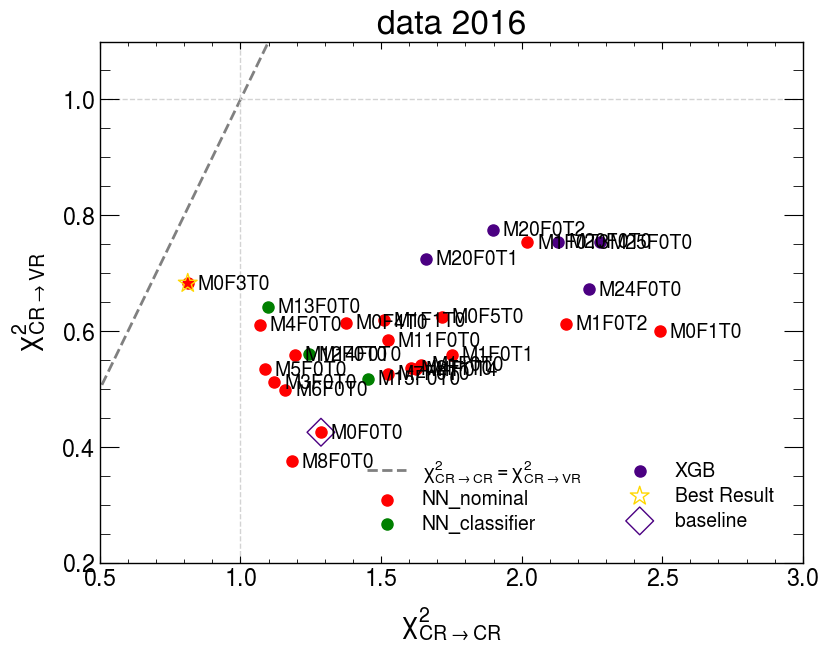

In [158]:
f, ax = plt.subplots()
plt.tight_layout()
r16=plot_models_scatter(
    x=opt_data_16_nm["chi2_closure"],
    y=opt_data_16_nm["chi2_extrapolation_bs"],
    model_list=opt_data_16_nm["model_key"],
    model_types=opt_data_16_nm["model_type"],
    xlim=(0.5,3),
    ylim=(0.2, 1.1),
    figsize=(8,5),
    ax=ax,
    title='data 2016',
    baseline=baseline16
)
# ax.set_xlim(0,2)
# ax.set_ylim(0,2)


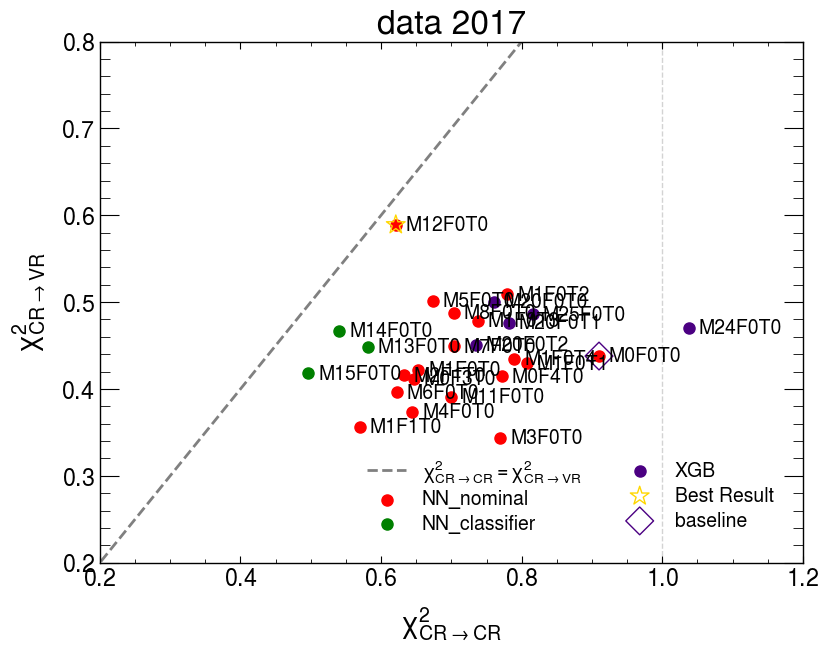

In [159]:
f, ax = plt.subplots()
plt.tight_layout()
r17=plot_models_scatter(
    x=opt_data_17_nm["chi2_closure"],
    y=opt_data_17_nm["chi2_extrapolation_bs"],
    model_list=opt_data_17_nm["model_key"],
    model_types=opt_data_17_nm["model_type"],
    xlim=(0.2,1.2),
    ylim=(0.2, 0.8),
    figsize=(8,5),
    ax=ax,
    title='data 2017',
    baseline=baseline17
)
# ax.set_xlim(0,2)
# ax.set_ylim(0,2)


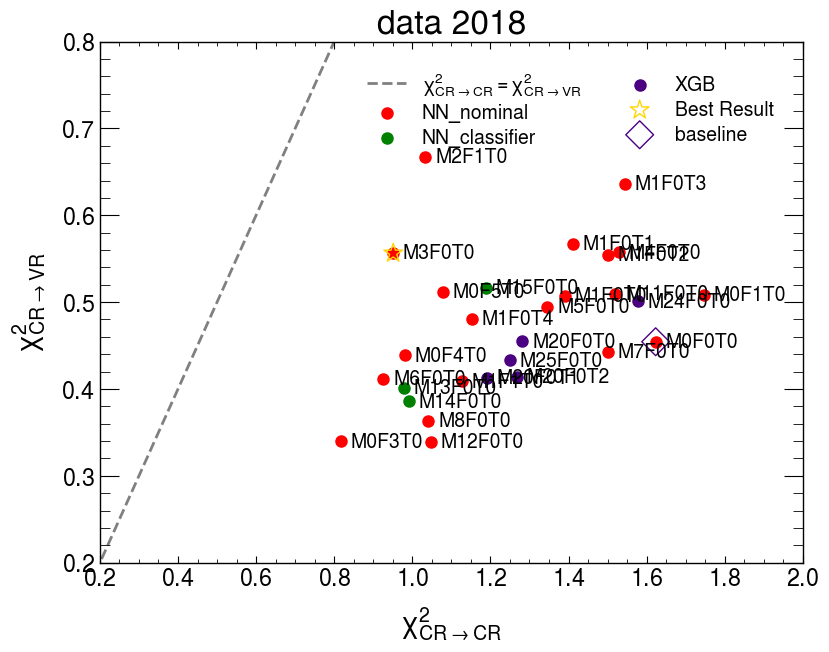

In [138]:
f, ax = plt.subplots()
plt.tight_layout()
r18=plot_models_scatter(
    x=opt_data_18_nm["chi2_closure"],
    y=opt_data_18_nm["chi2_extrapolation_bs"],
    model_list=opt_data_18_nm["model_key"],
    model_types=opt_data_18_nm["model_type"],
    xlim=(0.2,2),
    ylim=(0.2, 0.8),
    figsize=(8,5),
    ax=ax,
    title='data 2018',
    baseline=baseline18
)
# ax.set_xlim(0,2)
# ax.set_ylim(0,2)


In [160]:
help(plot_models)

Help on function plot_models in module __main__:

plot_models(model_list:list, metric:list, model_type:list, title='Model performance', baseline:float=None)



In [173]:
base_ed_16 = r16['results_df'].loc[r16['results_df']['model_key']=='M0F0T0','ed'][0]
base_ed_17 = r17['results_df'].loc[r17['results_df']['model_key']=='M0F0T0','ed'][0]
base_ed_18 = r18['results_df'].loc[r18['results_df']['model_key']=='M0F0T0','ed'][0]

In [175]:
base_ed_16

1.4087529581596094

In [182]:
r16_df = r16['results_df']

In [183]:
r16_df

model_key     model_type        ed         x         y
2     M0F3T0     NN_nominal  0.872258  0.812400  0.682445
13    M4F0T0     NN_nominal  1.136462  1.067862  0.611134
22   M13F0T0  NN_classifier  1.153592  1.096725  0.642274
14    M5F0T0     NN_nominal  1.181392  1.085477  0.533711
12    M3F0T0     NN_nominal  1.222225  1.120429  0.511662
15    M6F0T0     NN_nominal  1.263516  1.159597  0.498196
21   M12F0T0     NN_nominal  1.271094  1.192185  0.559119
23   M14F0T0  NN_classifier  1.319720  1.244090  0.559659
17    M8F0T0     NN_nominal  1.337792  1.182839  0.375037
0     M0F0T0     NN_nominal  1.408753  1.286171  0.425240
3     M0F4T0     NN_nominal  1.427599  1.374622  0.614704
24   M15F0T0  NN_classifier  1.530028  1.451918  0.517382
10    M1F1T0     NN_nominal  1.556192  1.508660  0.618320
20   M11F0T0     NN_nominal  1.579803  1.524086  0.584138
16    M7F0T0     NN_nominal  1.597292  1.525323  0.525942
11    M2F1T0     NN_nominal  1.671529  1.605644  0.535331
26   M20F0T1            XGB  1.682231  1.659530  0.724570
9     M1F0T4     NN_nominal  1.688300  1.622656  0.533799
5     M1F0T0     NN_nominal  1.706362  1.643601  0.541472
4     M0F5T0     NN_nominal  1.756000  1.715284  0.624050
6     M1F0T1     NN_nominal  1.805358  1.750780  0.559448
27   M20F0T2            XGB  1.910759  1.897470  0.775036
8     M1F0T3     NN_nominal  2.035381  2.020368  0.753249
25   M20F0T0            XGB  2.144524  2.130414  0.754394
7     M1F0T2     NN_nominal  2.190506  2.155964  0.612525
32   M24F0T0            XGB  2.261898  2.237964  0.671823
33   M25F0T0            XGB  2.291081  2.277741  0.753126
1     M0F1T0     NN_nominal  2.522957  2.490953  0.599422
29   M21F0T0            XGB  3.149064  2.756975  2.521740
31   M23F0T0            XGB  3.205757  2.991776  2.151589
30   M22F0T0            XGB  3.217013  2.945838  2.292752
19   M10F0T0     NN_nominal  3.658734  3.634670  1.418934
28   M20F1T2            XGB  3.669760  3.669657  0.972467
18    M9F0T0     NN_nominal  6.441352  5.121735  4.906256

In [209]:
best_ed_16 =(r16['results_df'].iloc[0]['model_key'], r16['results_df'].iloc[0]['ed'])

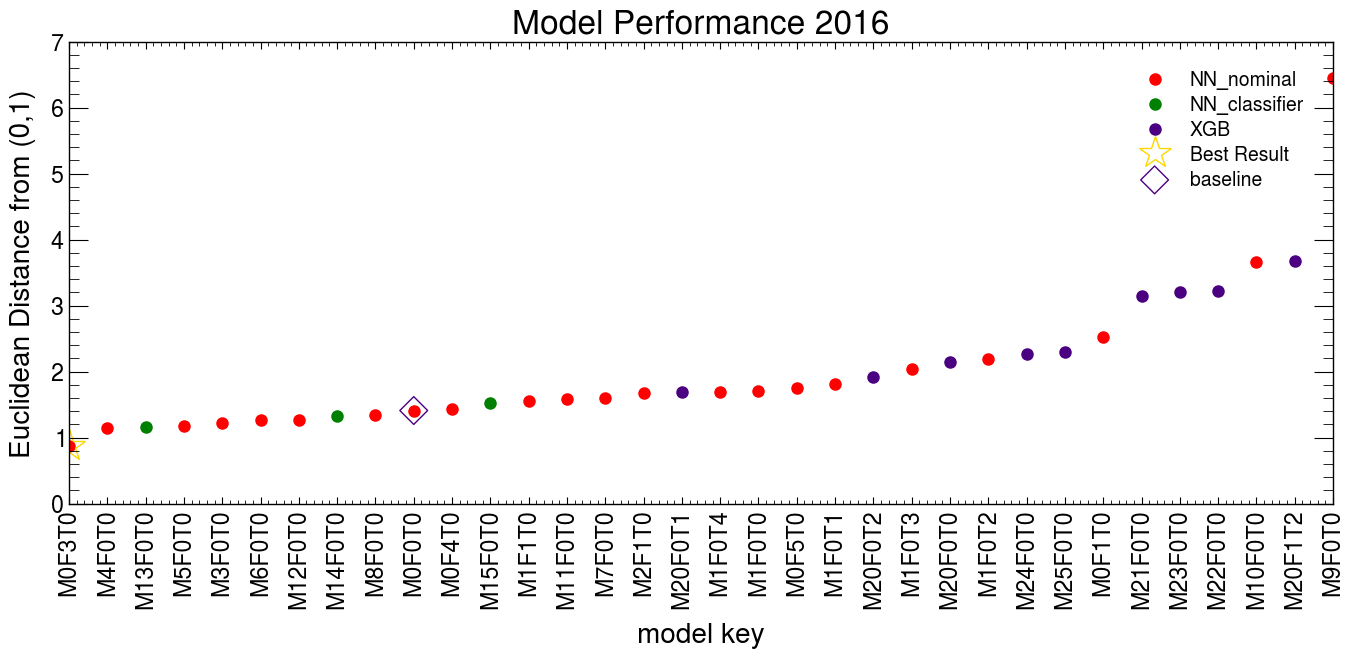

In [210]:
_ = plot_models(
    r16_df['model_key'].values,
    r16_df["ed"].values,
    model_type=r16_df["model_type"].values,
    baseline=("M0F0T0", base_ed_16),
    ylabel=r"Euclidean Distance from (0,1)",#($\chi^2_{CR\rightarrow CR} = 0$, $\chi^2_{CR\rightarrow VR} = 1$)",
    title = 'Model Performance 2016',
    best_result=best_ed_16
)

In [204]:
best_ed_17 =(r17['results_df'].iloc[0]['model_key'], r17['results_df'].iloc[0]['ed'])

In [205]:
r17[
    'results_df'
].iloc[0]

model_key        M12F0T0
model_type    NN_nominal
ed              0.744618
x               0.620904
y               0.588983
Name: 21, dtype: object

In [206]:
best_ed_17

('M12F0T0', 0.7446183705035142)

(0.0, 2.0)

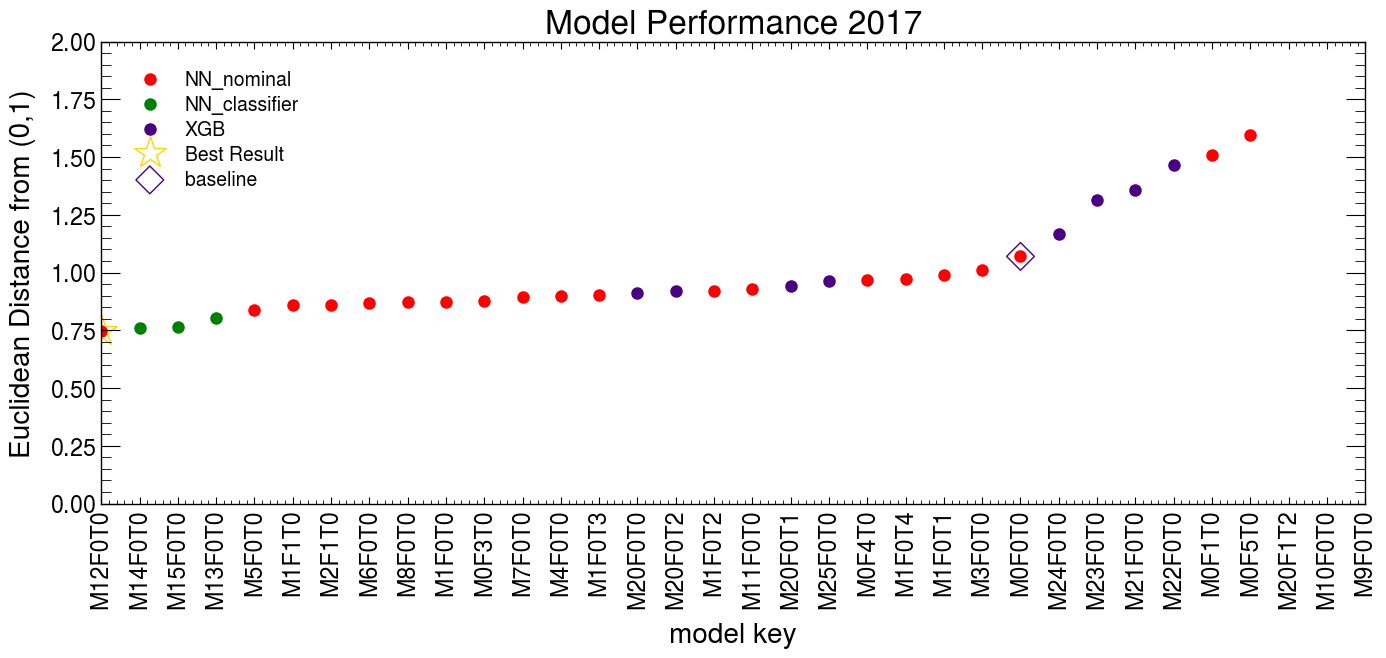

In [211]:
_ = plot_models(
    r17["results_df"]["model_key"].values,
    r17["results_df"]["ed"].values,
    model_type=r17["results_df"]["model_type"].values,
    baseline=("M0F0T0", base_ed_17),
    title = 'Model Performance 2017',
    ylabel=r"Euclidean Distance from (0,1)",#($\chi^2_{CR\rightarrow CR} = 0$, $\chi^2_{CR\rightarrow VR} = 1$)",
    best_result=best_ed_17
)
plt.ylim(0,2)

In [213]:
best_ed_18 =(r18['results_df'].iloc[0]['model_key'], r18['results_df'].iloc[0]['ed'])

(0.0, 2.0)

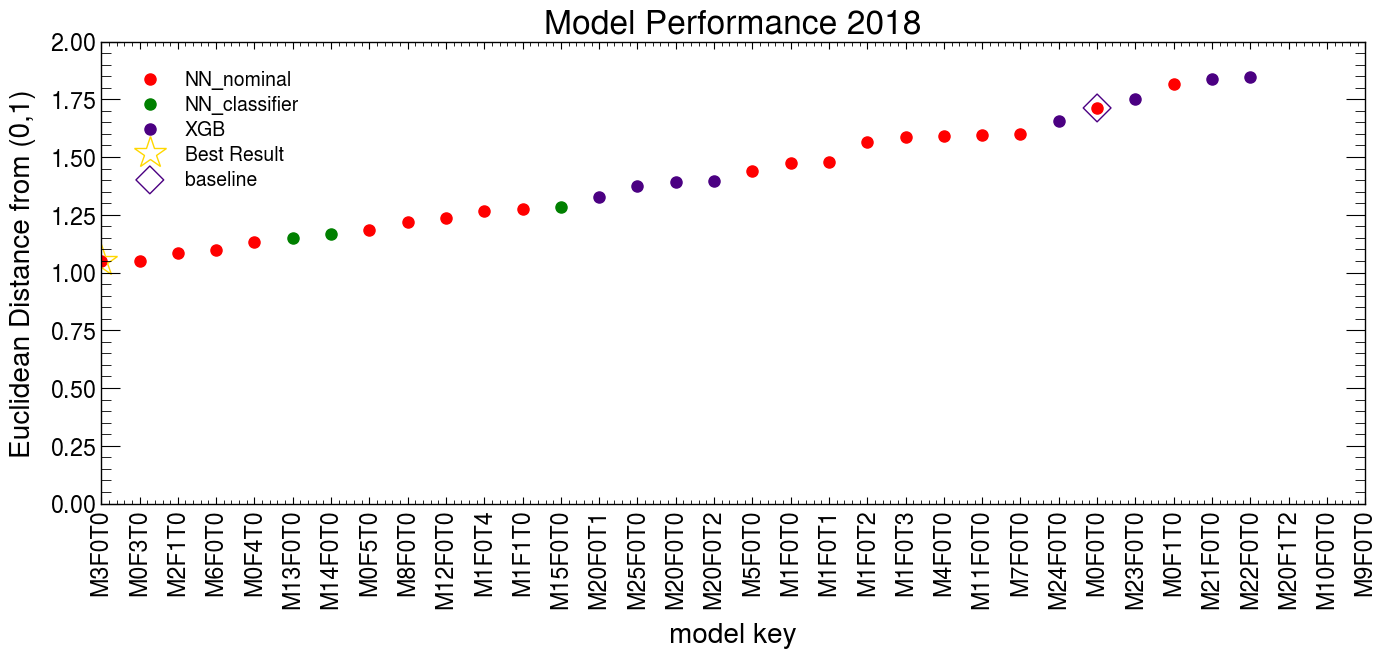

In [214]:
_ = plot_models(
    r18["results_df"]["model_key"].values,
    r18["results_df"]["ed"].values,
    model_type=r18["results_df"]["model_type"].values,
    baseline=("M0F0T0", base_ed_18),
    title = 'Model Performance 2018',
    ylabel=r"Euclidean Distance from (0,1)",#($\chi^2_{CR\rightarrow CR} = 0$, $\chi^2_{CR\rightarrow VR} = 1$)",
    best_result=best_ed_18
)
plt.ylim(0,2)

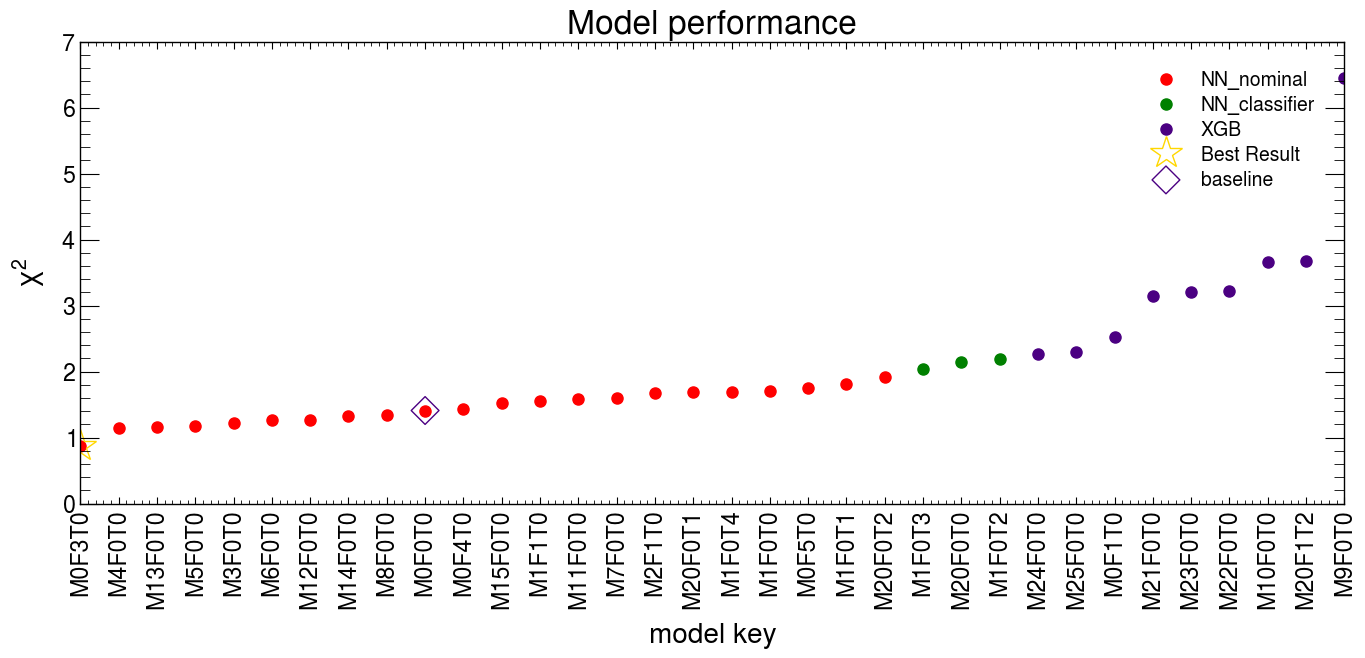

In [208]:
_=plot_models(r16['results_df']['model_key'], r16['results_df']['ed'],model_type=r16['results_df']['model_type'],baseline=('M0F0T0',base_ed_16))

In [114]:
r16['results_df']

model_key     model_type        ed         x         y
2     M0F3T0     NN_nominal  0.872258  0.812400  0.682445
13    M4F0T0     NN_nominal  1.136462  1.067862  0.611134
22   M13F0T0  NN_classifier  1.153592  1.096725  0.642274
14    M5F0T0     NN_nominal  1.181392  1.085477  0.533711
12    M3F0T0     NN_nominal  1.222225  1.120429  0.511662
15    M6F0T0     NN_nominal  1.263516  1.159597  0.498196
21   M12F0T0     NN_nominal  1.271094  1.192185  0.559119
23   M14F0T0  NN_classifier  1.319720  1.244090  0.559659
17    M8F0T0     NN_nominal  1.337792  1.182839  0.375037
0     M0F0T0     NN_nominal  1.408753  1.286171  0.425240
3     M0F4T0     NN_nominal  1.427599  1.374622  0.614704
24   M15F0T0  NN_classifier  1.530028  1.451918  0.517382
10    M1F1T0     NN_nominal  1.556192  1.508660  0.618320
20   M11F0T0     NN_nominal  1.579803  1.524086  0.584138
16    M7F0T0     NN_nominal  1.597292  1.525323  0.525942
11    M2F1T0     NN_nominal  1.671529  1.605644  0.535331
26   M20F0T1            XGB  1.682231  1.659530  0.724570
9     M1F0T4     NN_nominal  1.688300  1.622656  0.533799
5     M1F0T0     NN_nominal  1.706362  1.643601  0.541472
4     M0F5T0     NN_nominal  1.756000  1.715284  0.624050
6     M1F0T1     NN_nominal  1.805358  1.750780  0.559448
27   M20F0T2            XGB  1.910759  1.897470  0.775036
8     M1F0T3     NN_nominal  2.035381  2.020368  0.753249
25   M20F0T0            XGB  2.144524  2.130414  0.754394
7     M1F0T2     NN_nominal  2.190506  2.155964  0.612525
32   M24F0T0            XGB  2.261898  2.237964  0.671823
33   M25F0T0            XGB  2.291081  2.277741  0.753126
1     M0F1T0     NN_nominal  2.522957  2.490953  0.599422
29   M21F0T0            XGB  3.149064  2.756975  2.521740
31   M23F0T0            XGB  3.205757  2.991776  2.151589
30   M22F0T0            XGB  3.217013  2.945838  2.292752
19   M10F0T0     NN_nominal  3.658734  3.634670  1.418934
28   M20F1T2            XGB  3.669760  3.669657  0.972467
18    M9F0T0     NN_nominal  6.441352  5.121735  4.906256

# Top 5 models

In [217]:
r18['results_df']

model_key     model_type         ed         x          y
12    M3F0T0     NN_nominal   1.049375  0.950962   0.556311
2     M0F3T0     NN_nominal   1.050482  0.817124   0.339833
11    M2F1T0     NN_nominal   1.085520  1.033298   0.667363
15    M6F0T0     NN_nominal   1.096688  0.925743   0.412016
3     M0F4T0     NN_nominal   1.130632  0.981421   0.438625
22   M13F0T0  NN_classifier   1.147569  0.979223   0.401639
23   M14F0T0  NN_classifier   1.165893  0.990984   0.385787
4     M0F5T0     NN_nominal   1.183509  1.078257   0.512089
17    M8F0T0     NN_nominal   1.220206  1.040924   0.363304
21   M12F0T0     NN_nominal   1.237696  1.046565   0.339249
9     M1F0T4     NN_nominal   1.264395  1.152955   0.480972
10    M1F1T0     NN_nominal   1.272952  1.127230   0.408596
24   M15F0T0  NN_classifier   1.282428  1.187831   0.516595
26   M20F0T1            XGB   1.328543  1.191879   0.413102
33   M25F0T0            XGB   1.372401  1.249746   0.432885
25   M20F0T0            XGB   1.392816  1.281710   0.454879
27   M20F0T2            XGB   1.396533  1.267542   0.413790
14    M5F0T0     NN_nominal   1.437810  1.346045   0.494570
5     M1F0T0     NN_nominal   1.474657  1.389950   0.507404
6     M1F0T1     NN_nominal   1.476586  1.411782   0.567358
7     M1F0T2     NN_nominal   1.565596  1.500905   0.554606
8     M1F0T3     NN_nominal   1.586066  1.543817   0.636359
13    M4F0T0     NN_nominal   1.591600  1.528737   0.557110
20   M11F0T0     NN_nominal   1.596947  1.519784   0.509596
16    M7F0T0     NN_nominal   1.601531  1.501500   0.442866
32   M24F0T0            XGB   1.654437  1.577378   0.500959
0     M0F0T0     NN_nominal   1.712354  1.623089   0.454348
31   M23F0T0            XGB   1.751539  1.712037   1.369889
1     M0F1T0     NN_nominal   1.814077  1.746198   0.508402
29   M21F0T0            XGB   1.835939  1.736273   1.596681
30   M22F0T0            XGB   1.848142  1.769472   1.533478
28   M20F1T2            XGB   2.871377  2.832249   0.527588
19   M10F0T0     NN_nominal   6.101739  4.273512   5.355263
18    M9F0T0     NN_nominal  13.943584  5.824642  13.668744

In [218]:
top5_16 = r16['results_df'].iloc[0:5,:]
top5_17 = r17['results_df'].iloc[0:5,:]
top5_18 = r18['results_df'].iloc[0:5,:]

In [219]:
top5_16

model_key     model_type        ed         x         y
2     M0F3T0     NN_nominal  0.872258  0.812400  0.682445
13    M4F0T0     NN_nominal  1.136462  1.067862  0.611134
22   M13F0T0  NN_classifier  1.153592  1.096725  0.642274
14    M5F0T0     NN_nominal  1.181392  1.085477  0.533711
12    M3F0T0     NN_nominal  1.222225  1.120429  0.511662

In [230]:
top5_16 = top5_16.merge(bs_16_nm[['model_key','bs_perc_err_2b']], how='inner',on=['model_key'])
top5_17 = top5_17.merge(bs_17_nm[['model_key','bs_perc_err_2b']], how='inner',on=['model_key'])
top5_18 = top5_18.merge(bs_18_nm[['model_key','bs_perc_err_2b']], how='inner',on=['model_key'])
top5_16['rank']=np.arange(1,6)
top5_17['rank'] = np.arange(1,6)
top5_18['rank'] = np.arange(1,6)

# Bootstrap error comparison

**LOADING SIGNALS**

In [215]:
file_path = "/mnt/storage/lborgna/NNT/MDR_VEC/mc/mc16a_2b_shiftKR_lshi.root"
df_sig = load_nnt(file_path, trees=['sig'])
file_path = "/mnt/storage/lborgna/NNT/MDR_VEC/mc/mc16d_2b_shiftKR_lshi.root"
df_sig_17 = load_nnt(file_path, trees=['sig'])
file_path = "/mnt/storage/lborgna/NNT/MDR_VEC/mc/mc16e_2b_shiftKR_lshi.root"
df_sig_18 = load_nnt(file_path, trees=['sig'])

100%|██████████| 1/1 [00:00<00:00,  1.30it/s]


In [232]:
be = np.linspace(200,1200, 51)
x= 0.5*(be[:-1]+be[1:])

In [234]:
from matplotlib import cm
evenly_spaced_interval = np.linspace(0, 1, 6)
colors = [cm.rainbow(x) for x in evenly_spaced_interval]

**top 2016**

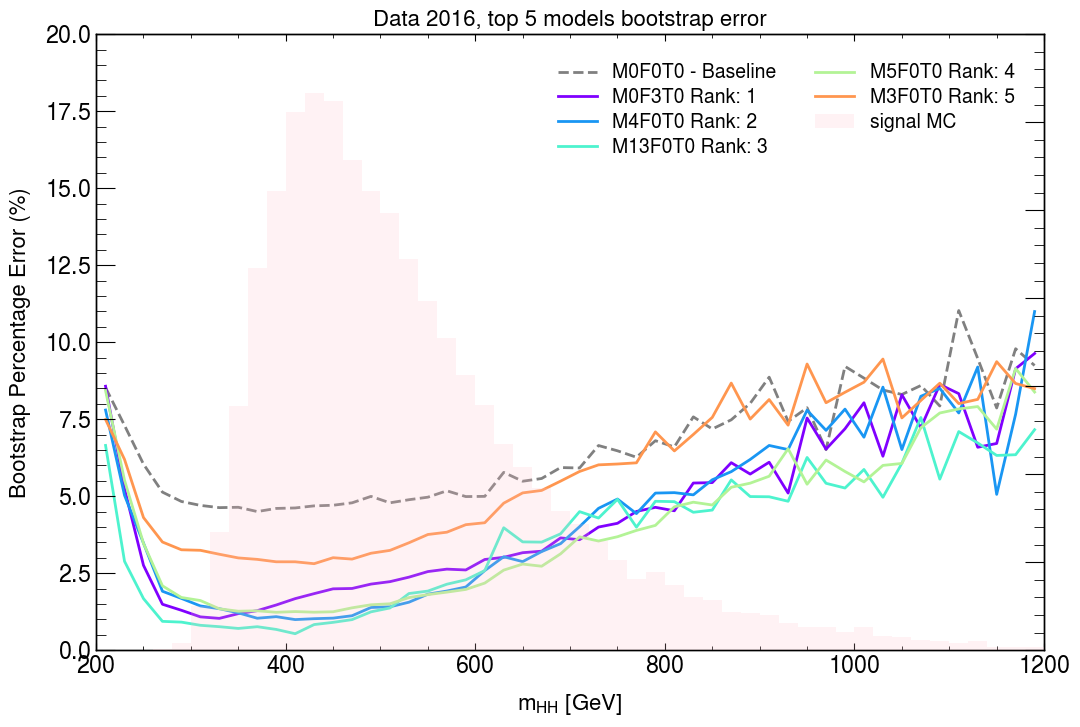

In [235]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(
    x,
    bs_16_nm.loc[bs_16_nm["model_key"] == "M0F0T0", "bs_perc_err_2b"][0],
    label="M0F0T0 - Baseline",
    ls="--",
    color="grey",
)
for row in top5_16.iterrows():

    ax.plot(
        x, row[1][-2], label=row[1][0] + f" Rank: {row[1][-1]}", color=colors[row[0]]
    )

# ax.legend(loc="best", ncol=2)
ax.set_xlabel("$m_{HH}$ [GeV]", fontsize=16)
ax.set_ylabel("Bootstrap Percentage Error (%)", fontsize=16)
ax.set_title("Data 2016, top 5 models bootstrap error", fontsize=16)
ax.set_ylim(0, 20)
ax2 = ax.twinx()
ax2.hist(
    df_sig.m_hh.values,
    range=(200, 1200),
    bins=50,
    histtype="stepfilled",
    weights=df_sig.mc_sf,
    zorder=9,
    alpha=0.2,
    label = 'signal MC',
    color='pink'
)


lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines+lines2, labels+labels2, ncol=2)

_= ax2.set_yticklabels([])

**top 2017**

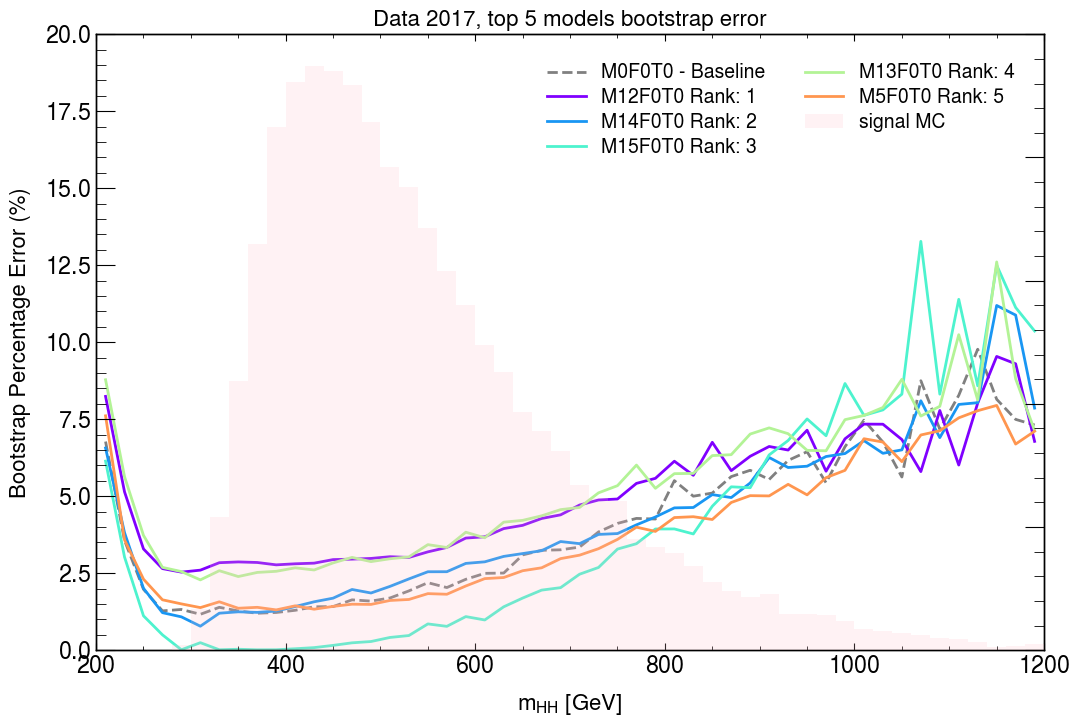

In [236]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(
    x,
    bs_17_nm.loc[bs_17_nm["model_key"] == "M0F0T0", "bs_perc_err_2b"][0],
    label="M0F0T0 - Baseline",
    ls="--",
    color="grey",
)
for row in top5_17.iterrows():

    ax.plot(
        x, row[1][-2], label=row[1][0] + f" Rank: {row[1][-1]}", color=colors[row[0]]
    )

# ax.legend(loc="best", ncol=2)
ax.set_xlabel("$m_{HH}$ [GeV]", fontsize=16)
ax.set_ylabel("Bootstrap Percentage Error (%)", fontsize=16)
ax.set_title("Data 2017, top 5 models bootstrap error", fontsize=16)
ax.set_ylim(0, 20)
ax2 = ax.twinx()
ax2.hist(
    df_sig_17.m_hh.values,
    range=(200, 1200),
    bins=50,
    histtype="stepfilled",
    weights=df_sig_17.mc_sf,
    zorder=9,
    alpha=0.2,
    label = 'signal MC',
    color='pink'
)


lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines+lines2, labels+labels2, ncol=2)

_= ax2.set_yticklabels([])

**top 2018**

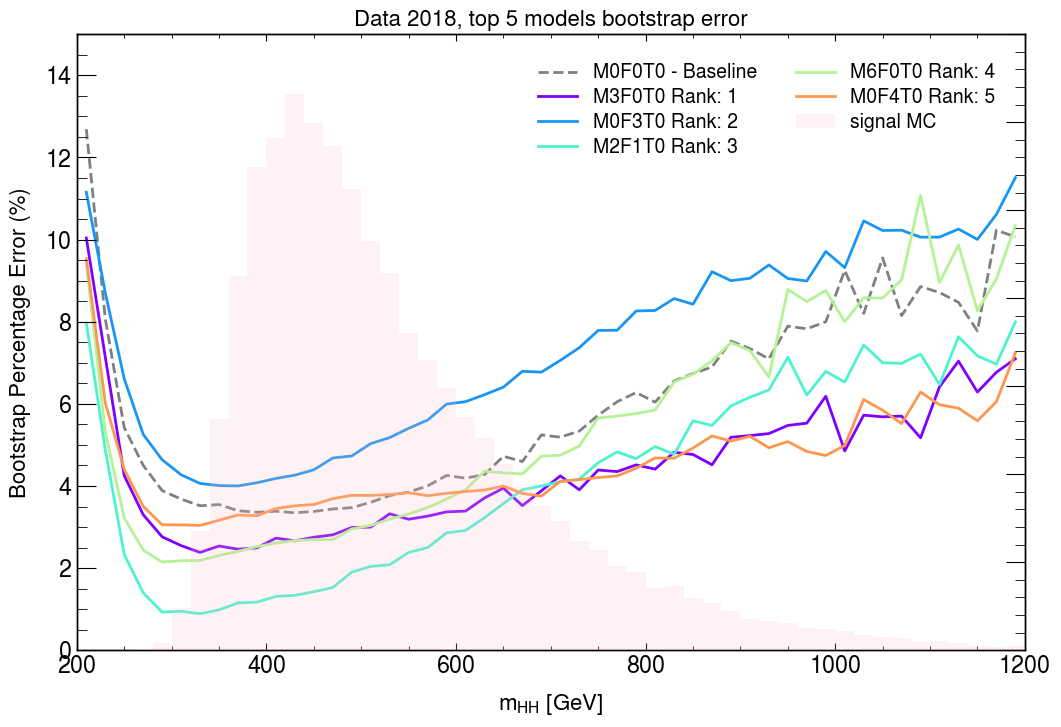

In [237]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(
    x,
    bs_18_nm.loc[bs_18_nm["model_key"] == "M0F0T0", "bs_perc_err_2b"][0],
    label="M0F0T0 - Baseline",
    ls="--",
    color="grey",
)
for row in top5_18.iterrows():

    ax.plot(
        x, row[1][-2], label=row[1][0] + f" Rank: {row[1][-1]}", color=colors[row[0]]
    )

# ax.legend(loc="best", ncol=2)
ax.set_xlabel("$m_{HH}$ [GeV]", fontsize=16)
ax.set_ylabel("Bootstrap Percentage Error (%)", fontsize=16)
ax.set_title("Data 2018, top 5 models bootstrap error", fontsize=16)
ax.set_ylim(0, 15)
ax2 = ax.twinx()
ax2.hist(
    df_sig_18.m_hh.values,
    range=(200, 1200),
    bins=50,
    histtype="stepfilled",
    weights=df_sig_18.mc_sf,
    zorder=9,
    alpha=0.2,
    label = 'signal MC',
    color='pink'
)


lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines+lines2, labels+labels2, ncol=2)

_= ax2.set_yticklabels([])